___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />


# TERCER EXAMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Nombre: ISRAEL CASTILLO HERRERA
## 708348

## Fecha: 27 de Noviembre del 2019

## Por: Oscar David Jaramillo Z.

# 1
Implementar el método de esquemas del trapecio
$$\hat V_0^{(2)}= {e^{-rT} \over M} \sum_{j=1}^{M} \Bigg({h\over 2T} \sum_{i=0}^{N-1} S_{t_i}(2+rh+(W_{t_{i+1}}-W_{t_i})\sigma)-K \Bigg)_+,$$
para valuar la opción call y put asiática con precio inicial, $S_0 = 100$, precio de ejercicio $K = 100$, tasa libre de riesgo $r = 0.10$, volatilidad $\sigma = 0.20$ y $T = 1$ año. Cuyo precio es $\approx 7.04$. Realizar la simulación en base a la siguiente tabla:
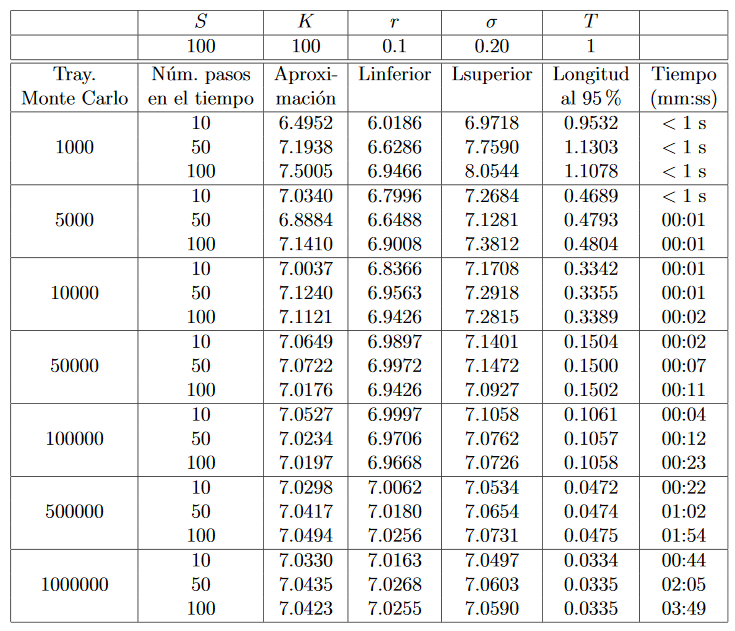

Observe que en esta tabla se encuentran los intervalos de confianza de la aproximación obtenida y además el tiempo de simulación que tarda en encontrar la respuesta cada método. 
- Se debe entonces realizar una simulación para la misma cantidad de trayectorias y número de pasos y construir una Dataframe de pandas de igual forma como se muestra en la tabla anterior donde se reporten los resultados obtenidos.

In [745]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import scipy.optimize as opt
import math
import scipy.stats as stats
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 9)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [746]:
def BSprices(mu,sigma,S0,NbTraj,NbStep):
    """
    Expresión de la solución de la ecuación de Black-Scholes
    St = S0*exp((r-sigma^2/2)*t+ sigma*DeltaW)
    
    Parámetros
    ---------
    mu    : Tasa libre de riesgo
    sigma : Desviación estándar de los rendimientos
    S0    : Precio inicial del activo subyacente
    NbTraj: Cantidad de trayectorias a simular
    NbStep: Número de días a simular
    """
    # Datos para la fórmula de St
    nu = mu-(sigma**2)/2
    DeltaT = 1/NbStep
    SqDeltaT = np.sqrt(DeltaT)
    DeltaW = SqDeltaT*np.random.randn(NbTraj,NbStep-1)
    
    # Se obtiene --> Ln St = Ln S0+ nu*DeltaT + sigma*DeltaW
    increments = nu*DeltaT + sigma*DeltaW
    concat = np.concatenate((np.log(S0)*np.ones([NbTraj,1]),increments),axis=1)
    
    # Se utiliza cumsum por que se quiere simular los precios iniciando desde S0
    LogSt = np.cumsum(concat,axis=1)
    # Se obtienen los precios simulados para los NbStep fijados
    St = np.exp(LogSt)
    # Vector con la cantidad de días simulados
    t = np.arange(0,NbStep)

    return St.T,t,DeltaW

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [747]:
NbTraj = 10
NbStep = 100
S0 = 100
r = 0.10
sigma = 0.2
K = 100

# Resolvemos la ecuación de black scholes para obtener los precios
St,t, DeltaW = BSprices(r,sigma,S0,NbTraj,NbStep)
# t = t*NbStep

prices = pd.DataFrame(St,index=t)
prices

,0,1,2,3,...,6,7,8,9
0,100.000,100.000,100.000,100.000,...,100.000,100.000,100.000,100.000
1,101.188,100.609,100.128,102.063,...,99.442,99.933,100.733,100.798
2,104.108,102.343,98.052,100.348,...,100.147,99.018,98.184,101.128
3,102.384,100.895,101.220,98.446,...,101.311,99.842,95.453,100.919
4,100.086,98.908,103.975,100.120,...,100.402,97.983,97.685,97.131
...,...,...,...,...,...,...,...,...,...
95,116.000,86.674,107.834,154.104,...,117.573,132.867,103.522,110.522
96,113.672,86.958,108.594,155.653,...,118.384,132.225,101.271,109.939
97,115.450,90.935,106.969,154.599,...,115.887,133.611,105.634,113.361
98,122.264,89.329,104.472,155.900,...,118.373,138.159,104.721,114.755


### CALL ASÍATICA MÉTODO TRAPECIO

In [776]:
def Riemann_approach(K:'Strike price',r:'Tasa libre de riesgo',S0:'Precio inicial',
                     NbTraj:'Número trayectorias',NbStep:'Cantidad de pasos a simular',
                     sigma:'Volatilidad',T:'Tiempo de cierre del contrato en años',
                    flag=None):
    time = datetime.datetime.now()
    # Resolvemos la ecuación de black scholes para obtener los precios
    St,t,DeltaW = BSprices(r,sigma,S0,NbTraj,NbStep)
    # Almacenamos los precios en un dataframe
    prices = pd.DataFrame(St,index=t)
    # Valor de h y delta W 
    h = T/NbStep
    delta_w = np.random.randn(NbStep,NbTraj)
    pric = (2 + r*h + delta_w*sigma)
    DeltaT = 1/NbStep
    SqDeltaT = np.sqrt(DeltaT)
    
    TRAPS = np.random.randn(NbStep,NbTraj)*sigma+2+r*(h)
    STRIKE = pd.DataFrame(K*np.ones([NbStep,NbTraj]),index=t)
    PRECIOS_SIM =np.cumsum(np.multiply(prices,TRAPS)*((T/NbStep)/(2*T)))
    
    
    call = pd.DataFrame({'Prima':np.exp(-r*T) \
                 *np.fmax(PRECIOS_SIM-STRIKE,np.zeros([NbStep,NbTraj])).mean(axis=1)}, index=t)
    put = pd.DataFrame({'Prima':np.exp(-r*T) \
                 *np.fmax(STRIKE-PRECIOS_SIM,np.zeros([NbStep,NbTraj])).mean(axis=1)}, index=t)
    
    # intervalos de confianza
    confianza = 0.95
    sigma_est = call.sem().Prima
    mean_est = call.iloc[-1].Prima
    i1 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
    sigma_est = put.sem().Prima
    mean_est = put.iloc[-1].Prima
    i1_put = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
#     return np.array([call.iloc[-1].Prima,i1[0],i1[1]])
    if flag==True:
        final = datetime.datetime.now()-time
        return final 
    else: 
        return call.iloc[-1].Prima, i1

In [777]:
NbTraj = [1000, 5000, 10000, 50000, 100000]
NbStep = [10,50,100]

S0 = 100     # Precio inicial
r = 0.10     # Tasa libre de riesgo 
sigma = 0.2  # volatilidad
K = 100      # Strike price
T = 1        # Tiempo de cierre - años

APROX = [Riemann_approach(K,r,S0,i,j,sigma,T, flag = None) for i in NbTraj for j in NbStep]
time = [Riemann_approach(K,r,S0,i,j,sigma,T, flag = True) for i in NbTraj for j in NbStep]
LIMITES = list(zip(*APROX))[1]
LIMITES= np.asarray(LIMITES)

In [778]:
trayectorias = [1000,5000,10000,50000,100000]
pasos = [10,50,100]
indx =  [(l,d) for l in trayectorias for d in pasos]
indx[:5]
index = pd.MultiIndex.from_tuples(indx, names=["Ntray","Nstep"])

In [779]:
data = pd.DataFrame(index = index,columns=["Aprox.","Lim Inf","Lim Sup","Error 95%","Tiempo"])
data["Aprox."] = list(zip(*APROX))[0]
data["Lim Inf"] = list(lims[:,0])
data["Lim Sup"] = list(lims[:,1])
data["Error 95%"] = list(np.abs(lims[:,0]-lims[:,1]))
data["Tiempo"] = time
data

Aprox.  Lim Inf  Lim Sup  Error 95%          Tiempo
Ntray  Nstep                                                     
1000   10      6.312  -14.994   19.296     34.291 00:00:00.024041
       50      6.660   -4.933    9.940     14.873 00:00:00.035146
       100     6.747   -2.935    7.577     10.512 00:00:00.031163
5000   10      6.885  -14.926   19.332     34.258 00:00:00.016699
       50      7.120   -5.181    9.752     14.933 00:00:00.056106
...              ...      ...      ...        ...             ...
50000  50      6.980   -5.123    9.800     14.923 00:00:00.474235
       100     7.045   -2.886    7.624     10.510 00:00:00.929369
100000 10      6.909  -14.899   19.339     34.238 00:00:00.202754
       50      6.976   -5.142    9.781     14.923 00:00:01.026992
       100     7.046   -2.916    7.598     10.514 00:00:02.038064

[15 rows x 5 columns]

### PUT ASIÁTICA MÉTODO DE TRAPECIO

In [780]:
def Riemann_approach(K:'Strike price',r:'Tasa libre de riesgo',S0:'Precio inicial',
                     NbTraj:'Número trayectorias',NbStep:'Cantidad de pasos a simular',
                     sigma:'Volatilidad',T:'Tiempo de cierre del contrato en años',
                    flag=None):
    time = datetime.datetime.now()
    # Resolvemos la ecuación de black scholes para obtener los precios
    St,t,DeltaW = BSprices(r,sigma,S0,NbTraj,NbStep)
    # Almacenamos los precios en un dataframe
    prices = pd.DataFrame(St,index=t)
    # Valor de h y delta W 
    h = T/NbStep
    delta_w = np.random.randn(NbStep,NbTraj)
    pric = (2 + r*h + delta_w*sigma)
    DeltaT = 1/NbStep
    SqDeltaT = np.sqrt(DeltaT)
    
    TRAPS = np.random.randn(NbStep,NbTraj)*sigma+2+r*(h)
    STRIKE = pd.DataFrame(K*np.ones([NbStep,NbTraj]),index=t)
    PRECIOS_SIM =np.cumsum(np.multiply(prices,TRAPS)*((T/NbStep)/(2*T)))
    
    
    call = pd.DataFrame({'Prima':np.exp(-r*T) \
                 *np.fmax(PRECIOS_SIM-STRIKE,np.zeros([NbStep,NbTraj])).mean(axis=1)}, index=t)
    put = pd.DataFrame({'Prima':np.exp(-r*T) \
                 *np.fmax(STRIKE-PRECIOS_SIM,np.zeros([NbStep,NbTraj])).mean(axis=1)}, index=t)
    
    # intervalos de confianza
    confianza = 0.95
    sigma_est = call.sem().Prima
    mean_est = call.iloc[-1].Prima
    i1 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
    sigma_est = put.sem().Prima
    mean_est = put.iloc[-1].Prima
    i1_put = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
#     return np.array([call.iloc[-1].Prima,i1[0],i1[1]])
    if flag==True:
        final = datetime.datetime.now()-time
        return final 
    else: 
        return put.iloc[-1].Prima, i1_put

In [781]:
NbTraj = [1000, 5000, 10000, 50000, 100000]
NbStep = [10,50,100]

S0 = 100     # Precio inicial
r = 0.10     # Tasa libre de riesgo 
sigma = 0.2  # volatilidad
K = 100      # Strike price
T = 1        # Tiempo de cierre - años

APROX = [Riemann_approach(K,r,S0,i,j,sigma,T, flag = None) for i in NbTraj for j in NbStep]
time = [Riemann_approach(K,r,S0,i,j,sigma,T, flag = True) for i in NbTraj for j in NbStep]
LIMITES = list(zip(*APROX))[1]
LIMITES= np.asarray(LIMITES)

In [782]:
trayectorias = [1000,5000,10000,50000,100000]
pasos = [10,50,100]
indx =  [(l,d) for l in trayectorias for d in pasos]
indx[:5]
index = pd.MultiIndex.from_tuples(indx, names=["Ntray","Nstep"])

In [783]:
data = pd.DataFrame(index = index,columns=["Aprox.","Lim Inf","Lim Sup","Error 95%","Tiempo"])
data["Aprox."] = list(zip(*APROX))[0]
data["Lim Inf"] = list(lims[:,0])
data["Lim Sup"] = list(lims[:,1])
data["Error 95%"] = list(np.abs(lims[:,0]-lims[:,1]))
data["Tiempo"] = time
data

Aprox.  Lim Inf  Lim Sup  Error 95%          Tiempo
Ntray  Nstep                                                     
1000   10      2.193  -14.994   19.296     34.291 00:00:00.017459
       50      2.471   -4.933    9.940     14.873 00:00:00.028049
       100     2.423   -2.935    7.577     10.512 00:00:00.021655
5000   10      2.266  -14.926   19.332     34.258 00:00:00.012619
       50      2.244   -5.181    9.752     14.933 00:00:00.046599
...              ...      ...      ...        ...             ...
50000  50      2.301   -5.123    9.800     14.923 00:00:00.462375
       100     2.364   -2.886    7.624     10.510 00:00:00.937503
100000 10      2.222  -14.899   19.339     34.238 00:00:00.199934
       50      2.341   -5.142    9.781     14.923 00:00:00.903784
       100     2.358   -2.916    7.598     10.514 00:00:01.836171

[15 rows x 5 columns]

# 2
Vamos a suponer que el curso de simulación de procesos financieros es una gran empresa de consultoría financiera que ofrece sus servicios a cualquier tipo de compañía o particular. Supongamos que acuden a nuestra empresa 4 personalidades con los siguientes problemas que desean solucionar:
> 1. El primer cliente, es un granjero que cultiva maíz y desea realizar una estrategia de cobertura que le permita prever las fluctuaciones en el precio de sus cultivos para el invierno entrante, en donde el pueda minimizar las pérdidas y maximizar las ganancias. 
> 2. La segunda empresa, es una empresa que construye productos en aluminio que tiene 1 año de estar ejerciendo en este tipo mercado. El gerente desea crear un plan de acción para expandir la empresa realizando estrategias financieras que le permitan maximizar sus ganancias y de esta forma cumplir con el objetivo planteado.
> 3. El tercer cliente, es una empresa joyera que fabrica sus piezas en oro. Esta empresa ha visto afectado sus ingresos debido a las fluctuaciones que ha presentado los últimos meses el precio del oro. Debido a esto, acude a nosotros para intentar mitigar estas fluctuaciones en el precio del oro, usando una adecuada estrategia financiera.
> 4. Nuestro último cliente, es la empresa mexicana PEMEX, que desea ejecutar ciertas estrategias financieras, que les permita cubrirse ante posibles caídas en el precio del barril del petróleo. Su objetivo en maximizar sus ganancias y minimizar las pérdidas de la compañía usando la mejor estrategia financiera (costo-beneficio).

Para cada uno de los clientes, se debe de presentar 4 posibles estrategias de cobertura usando opciones Europeas y Asiáticas, tipo call ó put. Además de ofrecer al cliente este abanico de posibilidades, ustedes como analistas financieros deben de recomendar la mejor estrategia costo-beneficio (basado en sus cálculos), que debería cada empresa tomar, para cumplir con su objetivo.

> ###  Criterio de evaluación
> - Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.
> - **Ejercicio 1**: 40%
> - **Ejercicio 2**: 60%. La valuación de cada tipo de opción corresponderá al 60% de este ejercicio y el restante 40% corresponderá a la decisión o recomendación basado en sus análisis que le recomendarán a cada compañía.

> ### Entrega
> Se debe de entregar un cuaderno de python donde se reporten todos los cálculos empleados en su análisis. La fecha límite de entrega será el jueves 5 de diciembre a las 8 pm y se expondrá ese mismo día los resultados obtenidos.

> ### Suposiciones 
> - Deben de definirse correctamente el nombre de las acciones a descargar de Yahoo según la empresa asignada.
> - El examen es individual y códigos idénticos serán penalizados.


### DESCARGAMOS LOS PRECIOS HISTORICOS

In [509]:
## DATOS DE MAIZ DE 1 AÑO
import pandas as pd 
corn = pd.read_csv('corn.csv', index_col='Date')
#corn
aluminum = pd.read_csv('aluminum.csv', index_col='Date')
#aluminum
gold = pd.read_csv('gold.csv', index_col='Date')
#gold
oil = pd.read_csv('oil.csv', index_col='Date')
#oil


In [924]:
def valuacion(data, K, fechaCierre):
    data.plot()
    ## RENDIMIENTOS
    def calc_daily_ret(closes):
        return np.log(closes/closes.shift(1)).iloc[1:]

    ri = calc_daily_ret(data)
    #print(ri)
    ri.plot()
    # Usando la media y desviación estándar de los rendimientos logarítmicos
    mu = ri.mean()[0]
    sigma = ri.std()[0]
    print("Media: ", mu)
    print("Sigma: ", sigma)
    
    
    r = 0.0160/360 # tasa libre de riesgo

    Hoy = "29-Nov-19"
    nscen = 1000
    dates = pd.date_range(start=Hoy,end=fechaCierre)
    ndays = 367
    #dates
    sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
    sim_ret.cumsum()
    
    S0= data.iloc[-1,0]  # Condición inicial del precio a simular
    sim_closes = S0*np.exp(sim_ret.cumsum())
    #sim_closes
    pd.concat([data,sim_closes]).plot(figsize=(8,6), legend=False);
    
    # Si esperamos que el precio del maíz sube a 400
    strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
    call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
    call.plot();
    print("Call: ", call.iloc[-1])
    
    # Si esperamos que el precio del maíz sube a 400
    strike_= pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
    put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
    put.plot();
    print("Put: ", put.iloc[-1])
    print("Precio al día de hoy es: ", S0)

##  MAIZ - EUROPEAS

##### Valuación usando simulación: modelo normal para los rendimientos

1) En esta situación, el cliente tiene un año para vender. En este caso, el quisiera protegerse contra la baja, y que tenga que vender más barato lo que ya tiene. Por lo que él va a asegurar su posición de compra con opciones PUT OTM. El tiene 1,000 toneladas de maíz a vender. El precio que tiene el mercado ahora le asegura una ganancia en dólares de:

In [925]:
print("Su ganancia al mercado ahora debe de ser: ", 1000*371.25)
print("Si el precio baja a $345 perdería: $", 1000*345-1000*371.25)
print("Si compra 597 opciones PUT para vender a $400 asegura ganancia de: ", 1000*400,\
      "con un costo de prima de: $", -597*48.14)
print("Su ganancia final será de: $", 1000*400-597*48.14)

Su ganancia al mercado ahora debe de ser:  371250.0
Si el precio baja a $345 perdería: $ -26250.0
Si compra 597 opciones PUT para vender a $400 asegura ganancia de:  400000 con un costo de prima de: $ -28739.58
Su ganancia final será de: $ 371260.42


2) En esta situación, el cliente espera que el precio baje tambien a 345. Por lo que decide cubrir sus posiciones vendiendo CALLS con un strike de 400, para completar su ganancia de 371,250 dolares. Vendiendo CALLS, y esperando que no suban los precios y puedan hacer una redención de las toneladas de maíz. Lo que ganaría si baja a 345 solamente con lo que ya tiene es:

In [926]:
print("Su ganancia al mercado a $345 sería de: $", 1000*345)
print("Debe de completar su ganancia con la prima con precio $37.13: ", 1000*371.25-1000*345)
print("Debería vender este numero de CALLS $", int((1000*371.25-1000*345)/37.132))
print("Con la venta de CALLS + Valor de Mercado completa su ganancia de : $", int(707*37.13 + 1000*345))

Su ganancia al mercado a $345 sería de: $ 345000
Debe de completar su ganancia con la prima con precio $37.13:  26250.0
Debería vender este numero de CALLS $ 706
Con la venta de CALLS + Valor de Mercado completa su ganancia de : $ 371250


Media:  4.309283778734948e-05
Sigma:  0.01442872928305143
Call:  Prima    50.269
Name: 2020-11-29 00:00:00, dtype: float64
Put:  Prima    38.058
Name: 2020-11-29 00:00:00, dtype: float64
Precio al día de hoy es:  371.25


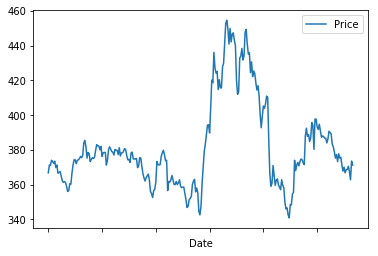

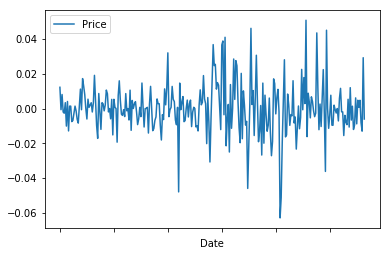

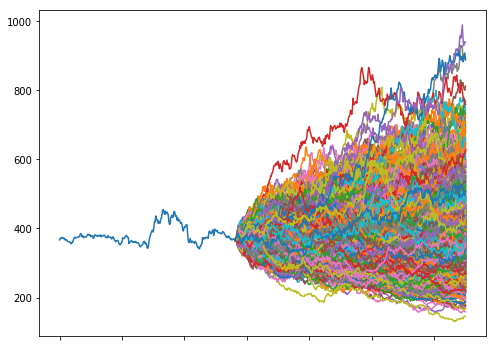

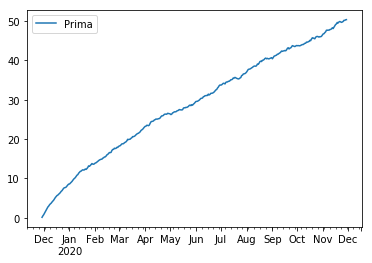

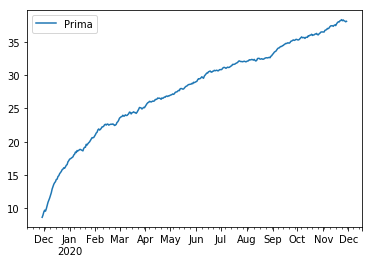

In [927]:
K = 380
fechaCierre =  "29-Nov-20" 
valuacion(corn, K, fechaCierre)

## ALUMINIO - EUROPEAS

##### Valuación usando simulación: modelo normal para los rendimientos

1) Para este caso, el producto de productos de aluminio debe de mantener sus costos de aluminio constantes para asegurar sus costos y obtener el crecimiento que quiere. Compras un CALL ITM para que puedas comprar a precio menor del que este.

In [536]:
print("Sus costos al mercado ahora son: $", -1000*1759.75)
print("Si el precio de alza a $1780 su costo aumenta a: $", -1000*1780)
print("Si compras 134 opciones CALL para comprar a $1759 asegura sus costos de: $", -1000*1740,\
      "con un costo de prima de: $", -225*177)
print("Su costo final será de: $", -1000*1740-225*177)
print("Se termina ahorrando: $", 1000*1780-1000*1740+225*177)

Sus costos al mercado ahora son: $ -1759750.0
Si el precio de alza a $1780 su costo aumenta a: $ -1780000
Si compras 134 opciones CALL para comprar a $1759 asegura sus costos de: $ -1740000 con un costo de prima de: $ -39825
Su costo final será de: $ -1779825
Se termina ahorrando: $ 79825


2) Para este caso, el está esperando que el precio suba. Debe mantener sus costos constantes. Compra un PUT ATM esperando que el precio suba y pueda ganar la prima cuando tenga que comprar a $1780

In [593]:
print("Sus costos al mercado ahora son: $", -1000*1759.75)
print("Si el precio de alza a $1780 su costo aumenta a: $", -1000*1780)
print("Gastaría más: $", -(1780000-1759750.0))
print("Si compra 210 opciones PUT para vender a $1740 asegura un beneficio de prima de: $", 210*96.171)
print("Su costo final + ganancia de prima será de: $", -1000*1780+210*96.171)
print("Solo gasta más: $", -int(1759804.09-1759750.0))

Sus costos al mercado ahora son: $ -1759750.0
Si el precio de alza a $1780 su costo aumenta a: $ -1780000
Gastaría más: $ -20250.0
Si compra 210 opciones PUT para vender a $1740 asegura un beneficio de prima de: $ 20195.91
Su costo final + ganancia de prima será de: $ -1759804.09
Solo gasta más: $ -54


Media:  -0.0003929392049967153
Sigma:  0.009654629624587952
Call:  Prima    161.273
Name: 2020-11-29 00:00:00, dtype: float64
Put:  Prima    84.743
Name: 2020-11-29 00:00:00, dtype: float64
Precio al día de hoy es:  1759.75


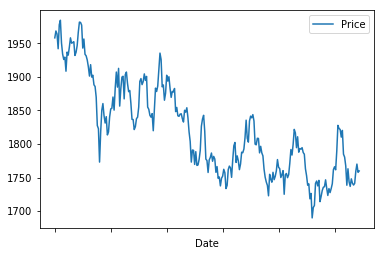

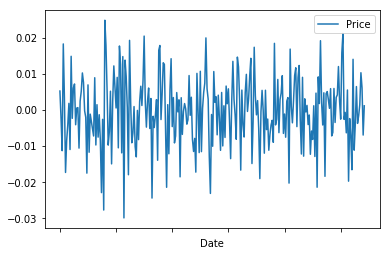

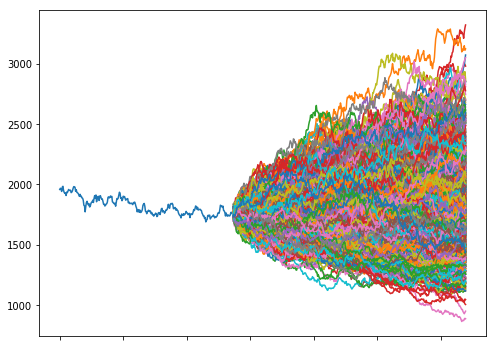

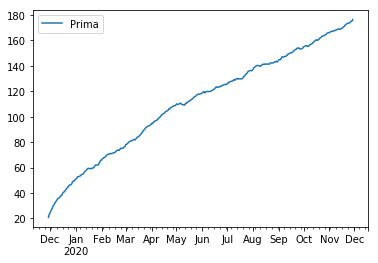

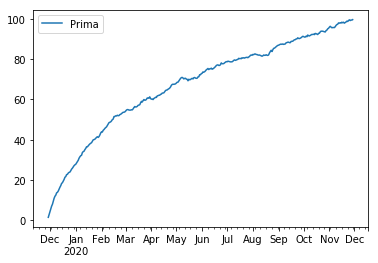

In [645]:
K = 1740
fechaCierre =  "29-Nov-20" 
valuacion(aluminum, K, fechaCierre)

## ORO - EUROPEAS

##### Valuación usando simulación: modelo normal para los rendimientos

1) Para este caso, el producto de productos de oro debe de mantener sus costos de oro constantes para asegurar sus costos y obtener las ganancias que quiere. Compras un CALL ITM para que puedas comprar a precio menor del que este.

In [562]:
print("Sus costos al mercado ahora son: $", -1000*1472.7)
print("Si el precio de alza a $1500 su costo aumenta a: $", -1000*1500)
print("Si compras 216 opciones CALL para comprar a $1465 asegura sus costos de: $", -1000*1465,\
      "con un costo de prima de: $", -216*126.352)
print("Su costo final será de: $", -1000*1465-216*126.352)
print("Se termina ahorrando: $", 1000*1500-1000*1465+216*126.352)

Sus costos al mercado ahora son: $ -1472700.0
Si el precio de alza a $1500 su costo aumenta a: $ -1500000
Si compras 216 opciones CALL para comprar a $1465 asegura sus costos de: $ -1465000 con un costo de prima de: $ -27292.032
Su costo final será de: $ -1492292.032
Se termina ahorrando: $ 62292.032


2) Para este caso, el está esperando que el precio suba. Debe mantener sus costos constantes. Compra un PUT ATM esperando que el precio suba y pueda ganar la prima cuando tenga que comprar a $1472.7

In [592]:
print("Sus costos al mercado ahora son: $", -1000*1472.7)
print("Si el precio de alza a $1500 su costo aumenta a: $", -1000*1500)
print("Gastaría más: $", -(1500000-1472700.0))
print("Si compra 370 opciones PUT para vender a $1465 asegura un beneficio de prima de: $", int(370*73.981))
print("Su costo final + ganancia de prima será de: $", -1000*1500+370*73.981)
print("Solo gasta más: $", -int(1472700.0-1472627.03))

Sus costos al mercado ahora son: $ -1472700.0
Si el precio de alza a $1500 su costo aumenta a: $ -1500000
Gastaría más: $ -27300.0
Si compra 370 opciones PUT para vender a $1465 asegura un beneficio de prima de: $ 27372
Su costo final + ganancia de prima será de: $ -1472627.03
Solo gasta más: $ -72


Media:  0.0005063443761015315
Sigma:  0.008430671651191879
Call:  Prima    113.638
Name: 2020-11-29 00:00:00, dtype: float64
Put:  Prima    54.866
Name: 2020-11-29 00:00:00, dtype: float64
Precio al día de hoy es:  1472.7


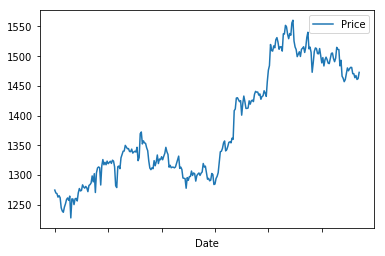

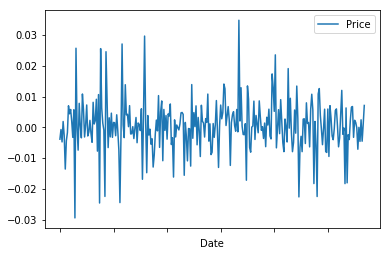

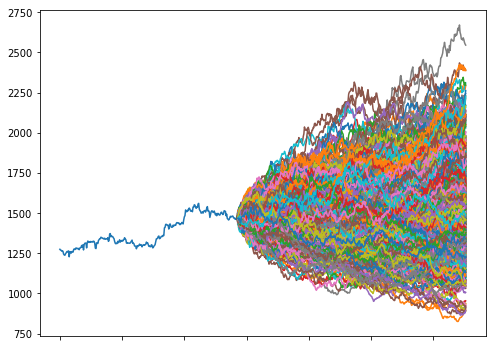

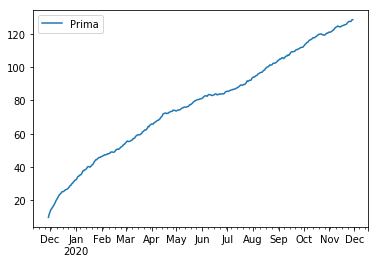

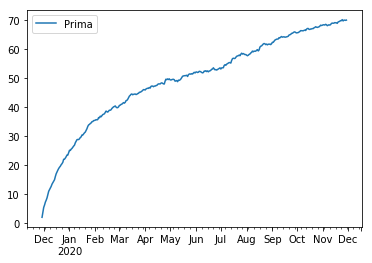

In [646]:
K = 1465
fechaCierre =  "29-Nov-20" 
valuacion(gold, K, fechaCierre)

## OIL - EUROPEAS

##### Valuación usando simulación: modelo normal para los rendimientos

1) En esta situación, el cliente tiene un año para vender. En este caso, el quisiera protegerse contra la baja, y que tenga que vender más barato lo que ya tiene. Por lo que él va a asegurar su posición de compra con opciones PUT OTM. El tiene 1,000 toneladas de petróleo a vender. El precio que tiene el mercado ahora le asegura una ganancia en dólares de:

In [589]:
print("Su ganancia al mercado ahora debe de ser: $", 100000*55.17)
print("Si el precio baja a $50 perdería: $", -(100000*55.17-100000*50))
print("Si compra 51991 opciones PUT para vender a $60 asegura ganancia de: $", 100000*60,\
      "con un costo de prima de: $", -51991*9.944)
print("Su ganancia final será de: $", 100000*60-51991*9.944)
print("Solo perderia: $", -int(5517000.0-5483001.496))

Su ganancia al mercado ahora debe de ser: $ 5517000.0
Si el precio baja a $50 perdería: $ -517000.0
Si compra 51991 opciones PUT para vender a $60 asegura ganancia de: $ 6000000 con un costo de prima de: $ -516998.504
Su ganancia final será de: $ 5483001.496
Solo perderia: $ -33998


2) En esta situación, el cliente espera que el precio baje tambien a 50. Por lo que decide cubrir sus posiciones vendiendo CALLS con un strike de 60, para completar su ganancia de 5517000 dolares. Vendiendo CALLS, y esperando que no suban los precios y puedan hacer una redención de las toneladas de petróleo. 

In [586]:
print("Su ganancia al mercado ahora debe de ser: $", 100000*55.17)
print("Debe de completar su ganancia con la prima con precio $50: $", 100000*50)
print("Debería vender este numero de CALLS ", (100000*55.17-100000*50)/11.737)
print("Con la venta de CALLS + Valor de Mercado completa su ganancia de : $", 44049*11.737 + 100000*50)
print("Evitaría perder: $", 5517000.0- 5000000)
print("Gana: $", int(5517003.113-5517000.0))

Su ganancia al mercado ahora debe de ser: $ 5517000.0
Debe de completar su ganancia con la prima con precio $50: $ 5000000
Debería vender este numero de CALLS  44048.73477038425
Con la venta de CALLS + Valor de Mercado completa su ganancia de : $ 5517003.113
Evitaría perder: $ 517000.0
Gana: $ 3


Media:  -0.0005056628066863894
Sigma:  0.02322533452016659
Call:  Prima    16.77
Name: 2020-11-29 00:00:00, dtype: float64
Put:  Prima    5.891
Name: 2020-11-29 00:00:00, dtype: float64
Precio al día de hoy es:  55.17


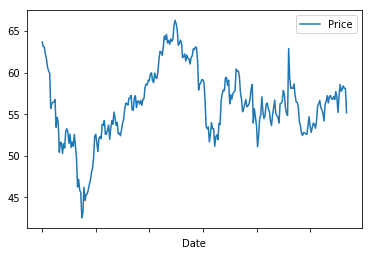

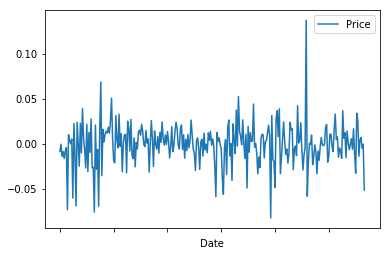

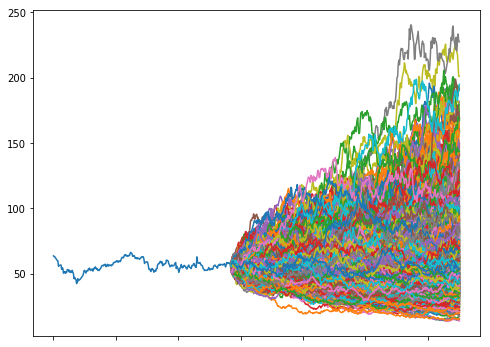

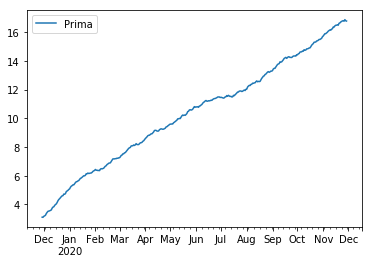

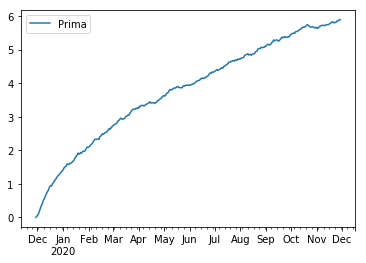

In [649]:
K = 52
fechaCierre =  "29-Nov-20" 
valuacion(oil, K, fechaCierre)

## OPCIONES ASÍATICAS 

In [840]:
prices

,0,1,2,3,...,6,7,8,9
0,100.000,100.000,100.000,100.000,...,100.000,100.000,100.000,100.000
1,101.188,100.609,100.128,102.063,...,99.442,99.933,100.733,100.798
2,104.108,102.343,98.052,100.348,...,100.147,99.018,98.184,101.128
3,102.384,100.895,101.220,98.446,...,101.311,99.842,95.453,100.919
4,100.086,98.908,103.975,100.120,...,100.402,97.983,97.685,97.131
...,...,...,...,...,...,...,...,...,...
95,116.000,86.674,107.834,154.104,...,117.573,132.867,103.522,110.522
96,113.672,86.958,108.594,155.653,...,118.384,132.225,101.271,109.939
97,115.450,90.935,106.969,154.599,...,115.887,133.611,105.634,113.361
98,122.264,89.329,104.472,155.900,...,118.373,138.159,104.721,114.755


In [947]:

def valuacion2(data, K, fechaCierre):
    #np.random.seed(555)
    data.plot()
    plt.show()
    def calc_daily_ret(closes):
        return np.log(closes/closes.shift(1)).iloc[1:]
    
    def BSprices(mu,sigma,S0,NbTraj,NbStep):
    # Datos para la fórmula de St
        nu = mu-(sigma**2)/2
        DeltaT = 1/NbStep
        SqDeltaT = np.sqrt(DeltaT)
        DeltaW = np.random.randn(NbTraj,NbStep-1)
    
        # Se obtiene --> Ln St = Ln S0+ nu*DeltaT + sigma*DeltaW
        increments = nu*DeltaT + sigma*DeltaW
        concat = np.concatenate((np.log(S0)*np.ones([NbTraj,1]),increments),axis=1)
    
        # Se utiliza cumsum por que se quiere simular los precios iniciando desde S0
        LogSt = np.cumsum(concat,axis=1)
        # Se obtienen los precios simulados para los NbStep fijados
        St = np.exp(LogSt)
        # Vector con la cantidad de días simulados
        t = np.arange(0,NbStep)
        return St.T,t


    Hoy = "29-Nov-19"
    dates = pd.date_range(start=Hoy,end=fechaCierre)
    NbTraj = 100
    NbStep = len(dates)
    
    ri = calc_daily_ret(data)
    mu = ri.mean()[0]
    sigma = ri.std()[0]
    r = 0.0153/360
    S0= data.iloc[-1,0] 

    print("Media: ", mu)
    print("Sigma: ", sigma)
    print("El precio actual, S0 es: ", S0)

    # Resolvemos la ecuación de black scholes para obtener los precios al futuro.
    St,t = BSprices(r,sigma,S0,NbTraj,NbStep)

    prices = pd.DataFrame(St,index=t)
    prices

    # Graficamos los precios simulados
    plt.plot(t,St)

    # Obtenemos los precios promedios en todo el tiempo y los graficamos 
    Average_t = prices.expanding(1,axis=0).mean()
    #Average_t = prices.rolling(window=20).mean()
    plt.plot(t,Average_t)
    plt.legend()
    plt.show()#
    
    #### Sumas de Riemann
    strike = pd.DataFrame(K*np.ones([NbStep,NbTraj]), index=t)
    T = 1 # Tiempo de cierre del contrato
    call = pd.DataFrame({'Prima':np.exp(-r*T) \
             *np.fmax(Average_t-strike,np.zeros([NbStep,NbTraj])).mean(axis=1)}, index=t)
    call.plot()
    print('La prima CALL estimada usando %i trayectoris es: %2.2f'%(NbTraj,call.iloc[-1].Prima))


    put = pd.DataFrame({'Prima':np.exp(-r*T) \
             *np.fmax(strike-Average_t,np.zeros([NbStep,NbTraj])).mean(axis=1)}, index=t)
    put.plot()
    print('La prima PUT estimada usando %i trayectoris es: %2.2f'%(NbTraj,put.iloc[-1].Prima))


## MAÍZ - ASIATICAS

In [948]:
print("Si espera que suba:")
print("El puede vender futuros en este momento por el precio actual: $", 1000*371.25)
print("Si el precio sube a a $380 gana: $", 1000*380-1000*371.25)
print("Para esto ya compró un 108 puts: $", 108*9.23)
print("Vende con el put a $380 y hace: $", 100*380-996.84)
print("Hizo: $", 37003.16+1000*380-996.84)

Si espera que suba:
El puede vender futuros en este momento por el precio actual: $ 371250.0
Si el precio sube a a $380 gana: $ 8750.0
Para esto ya compró un 108 puts: $ 996.84
Vende con el put a $380 y hace: $ 37003.16
Hizo: $ 416006.32


- SI ESTÁ ESPERANDO QUE EL PRECIO DEL MAÍZ NO SE MUEVA MUCHO, PUEDE COMPRAR UNA OPCION CALL ITM CON UN STRIKE MENOR. VENDER DOS OPCIONES CALL ATM Y COMPRAR UNA OPCION CALL OTM. DE ESTA MANERA, TIENE LAS PRIMAS AL DÍA DE HOY PARA GASTOS QUE TENGA QUE INCURRIR HASTA LA POSIBILIDAD DE VENDER AL PRECIO, QUE NO SE MOVIÓ MUCHO. ESTO LE ES EFECTIVO SI NECESITA EL DINERO AHORA ANTES DE QUE TENGA QUE VENDER EN INVIERNO Y EXPIREN LAS OPCIONES. **LONG BUTTERFLY CALL SPREAD**.

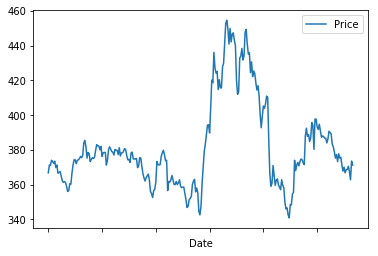

No handles with labels found to put in legend.


Media:  4.309283778734948e-05
Sigma:  0.01442872928305143
El precio actual, S0 es:  371.25


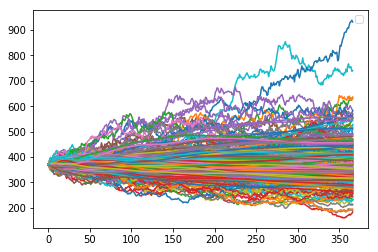

La prima CALL estimada usando 100 trayectoris es: 59.77
La prima PUT estimada usando 100 trayectoris es: 5.05


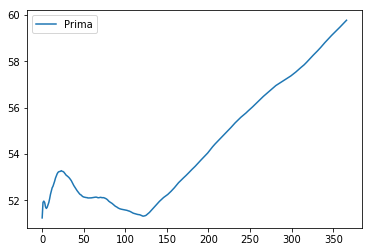

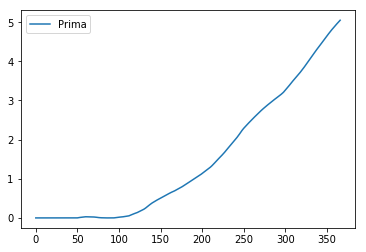

In [949]:
K = 320
fechaCierre =  "29-Nov-20" 
valuacion2(corn, K, fechaCierre)

### ALUMINUM - ASIATICA 

- DADO QUE EL ALUMINIO ES UN ACTIVO QUE EXPERIMENT POCA VOLATILIDAD (Y ESTA ES ESTABLE) PUEDE HACER UN **IRON CONDOR**. DONDE VENDE UN OTM PUT Y COMPRANDO UN OTM PUT. DE ESTA MANERA PUEDE TENER LAS PRIMAS EN ESTE MOMENTO SI NECESITA INCURRIR EN COSTOS. Y ESPERANDO LA BAJA VOLATILIDAD PUEDE HACER UNA COMPRA **CERCA DEL PROMEDIO** CUANDO NECESITE EL ALUMINIO.. 

In [807]:
print("Si espera que suba:")
print("El puede vender futuros en este momento por el precio actual: $", 1000*1759.75)
print("Si el precio sube a a $178 gana: $", 1000*1780-1000*1759.75)
print("Para esto ya compró un 5 puts: $", 5*182)
print("Vende con el put a $1800 y hace: $", 100*1800-5*182)
print("Hizo: $", 1000*1780-1000*1759.75+100*1800-5*182)
print("Y COMPRA AL PRECIO: $", 1000*1780-1000*1759.75+100*1800-5*182-1000*1780)
print("SIN COBERTURA GASTA: $", -1000*1780)

Si espera que suba:
El puede vender futuros en este momento por el precio actual: $ 1759750.0
Si el precio sube a a $178 gana: $ 20250.0
Para esto ya compró un 5 puts: $ 910
Vende con el put a $1800 y hace: $ 179090
Hizo: $ 199340.0
Y COMPRA AL PRECIO: $ -1580660.0
SIN COBERTURA GASTA: $ -1780000


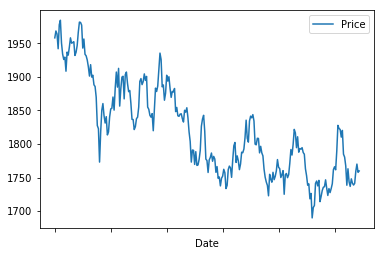

Media:  -0.0003929392049967153
Sigma:  0.009654629624587952
El precio actual, S0 es:  1759.75


No handles with labels found to put in legend.


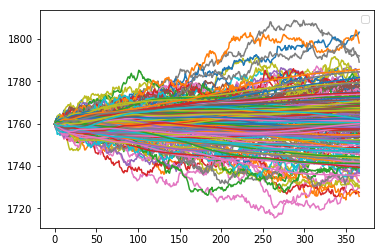

La prima CALL estimada usando 100 trayectoris es: 0.00
La prima PUT estimada usando 100 trayectoris es: 186.32


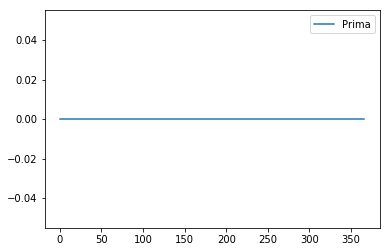

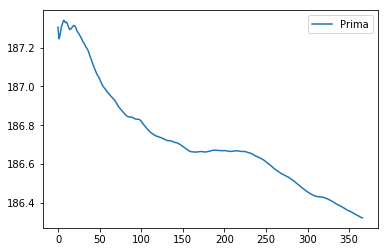

In [815]:
K = 1950
fechaCierre =  "29-Nov-20" 
valuacion2(aluminum, K, fechaCierre)

### GOLD - ASIATICA

- PUEDE HACER UN **LONG STRADDLE**. COMPRANDO UN PUT Y UN CALL OTM AL MISMO TIEMPO. EN ESTE CASO LE CONVIENE CUANDO EL MERCADO DEL ORO HACE MOVIMIENTOS AMPLIOS. QUE ES LO QUE GENERALMENTE HACE ESTE ACTIVO. PARA ESTO SE TIENE QUE MODIFICAR LOS STRIKES Y OBTENER LAS PRIMAS DE CALL/PUT.

- AQUÍ TE CONVIENE HACER UN **MARRIED PUT**, DONDE VENDE EN FUTUROS DE ORO Y UN CALL DE UNIDADES EQUIVALENTES. ESO LE DA GANANCIAS EN LAS BAJADAS, Y CUANDO NECESITE COMPRAR PUEDE COMPRAR A UN PRECIO MODERADO CERCA DE LA MEDIA. SUPONIENDO QUE ESPERA QUE EL PRECIO BAJE. SI SUBE, PUEDE HACER LA COMPRA MÁS BARATO, Y CON SUS VENTAS CERRAR EL DIFERENCIAL QUE PERDIÓ CON LOS FUTUROS EN CORTO. O CON UN PUT ATM PUEDE VENDER ESAS POSICIONES. DADO QUE LAS PRIMAS DE ASIÁTICAS SON MENORES. 

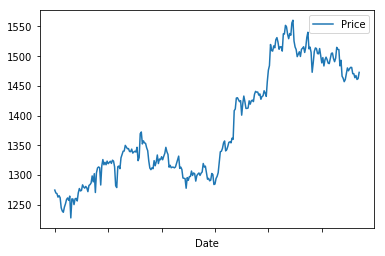

No handles with labels found to put in legend.


Media:  0.0005063443761015315
Sigma:  0.008430671651191879
El precio actual, S0 es:  1472.7


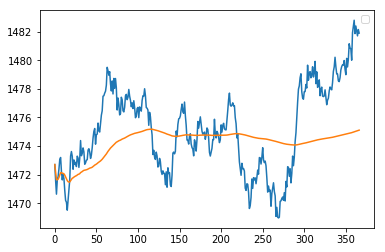

La prima CALL estimada usando 1 trayectoris es: 0.00
La prima PUT estimada usando 1 trayectoris es: 4.82


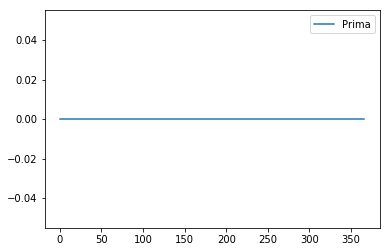

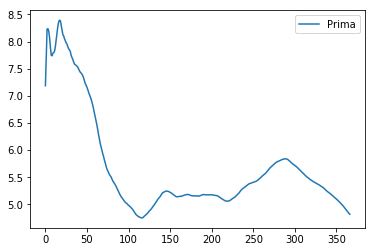

In [811]:
K = 1480
fechaCierre =  "29-Nov-20" 
valuacion2(gold, K, fechaCierre)

### OIL - ASIATICA

- DADO QUE EL PETRÓLEO HA TENIDO GANANCIAS SUBSTANCIALES. TENDRÍA QUE HACER UN **PROTECTIVE COLLAR**. DONDE COMPRA UN OTM PUT Y UN OTM CALL. QUE LE PROTEGE DE LAS CAIDAS, Y LE PERMITE VENDER MÁS CARO. LO CUAL ES POSITIVO PARA PEMEX QUE NECESITA TODOS LOS BENEFICIOS POSIBLES.

- AQUÍ TE CONVIENE HACER UN **MARRIED PUT**, DONDE COMPRA LAS UNIDADES DE PETRÓLEO Y UN PUT DE UNIDADES EQUIVALENTES. ESO LO PROTEGE DE BAJADAS. DE ESTA MANERA SI EL PETRÓLEO SIGUE SUBIENDO HACE GANANCIA, Y SI BAJA PUEDE VENDER. INCURRIENDO EN UNA PEQUEÑA PRIMA PERO QUE PROTEGE SUS VENTAS. Y LE PERMITE VENDER EN OTROS RANGOS

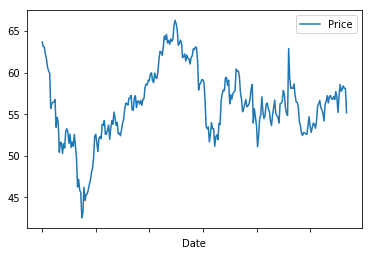

No handles with labels found to put in legend.


Media:  -0.0005056628066863894
Sigma:  0.02322533452016659
El precio actual, S0 es:  55.17


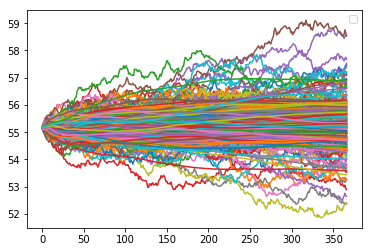

La prima CALL estimada usando 100 trayectoris es: 0.00
La prima PUT estimada usando 100 trayectoris es: 9.57


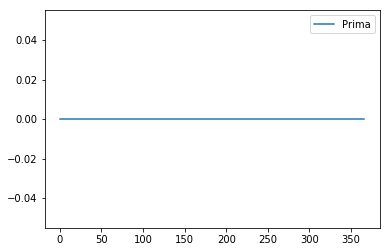

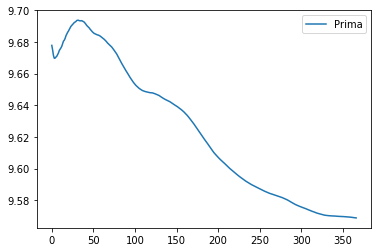

In [816]:
K = 65
fechaCierre =  "29-Nov-20" 
valuacion2(oil, K, fechaCierre)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>